In [4]:
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import datetime
import glob
from matplotlib.colors import Normalize


def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels


In [11]:
path_out = '20240507/'
files = glob.glob(path_out+"*")
files.sort()
files

['20240507/090017.npy',
 '20240507/090027.npy',
 '20240507/090037.npy',
 '20240507/090047.npy',
 '20240507/090057.npy',
 '20240507/090107.npy',
 '20240507/090117.npy',
 '20240507/090127.npy',
 '20240507/090137.npy',
 '20240507/090147.npy',
 '20240507/090157.npy',
 '20240507/090207.npy',
 '20240507/090217.npy',
 '20240507/090227.npy',
 '20240507/090252.npy',
 '20240507/090302.npy',
 '20240507/090312.npy',
 '20240507/090322.npy',
 '20240507/090332.npy',
 '20240507/090342.npy',
 '20240507/090352.npy',
 '20240507/090402.npy',
 '20240507/090412.npy',
 '20240507/090422.npy',
 '20240507/090432.npy',
 '20240507/090442.npy',
 '20240507/090452.npy',
 '20240507/090502.npy',
 '20240507/090512.npy',
 '20240507/090522.npy',
 '20240507/090532.npy',
 '20240507/090542.npy',
 '20240507/090552.npy',
 '20240507/090602.npy',
 '20240507/090612.npy',
 '20240507/090622.npy',
 '20240507/090632.npy',
 '20240507/090642.npy',
 '20240507/090652.npy',
 '20240507/090702.npy',
 '20240507/090712.npy',
 '20240507/09072

In [28]:

dx= 5.106500953873407 
dt= 0.0016


data = []
first_filename = files[0]
for file in files[:6]:
   data.append(np.load(file))
data = np.concatenate(data)
print('2024-05-07 ' + first_filename.split("\\")[-1].split(".")[0])
time_start = datetime.datetime.strptime('2024-05-07 ' + first_filename.split("/")[-1].split(".")[0], "%Y-%m-%d %H%M%S")
index = pd.date_range(start=time_start, periods=len(data), freq=f'{dt}s')


columns = np.arange(len(data[0])) * dx


df = pd.DataFrame(data=data, index=index, columns=columns)


2024-05-07 20240507/090017


(37490, 52)

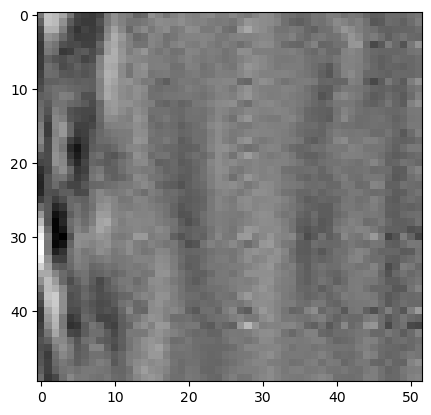

In [48]:
arr = df.to_numpy()
plt.imshow(arr[100:150,:], cmap="gray")
arr[10:,:].shape


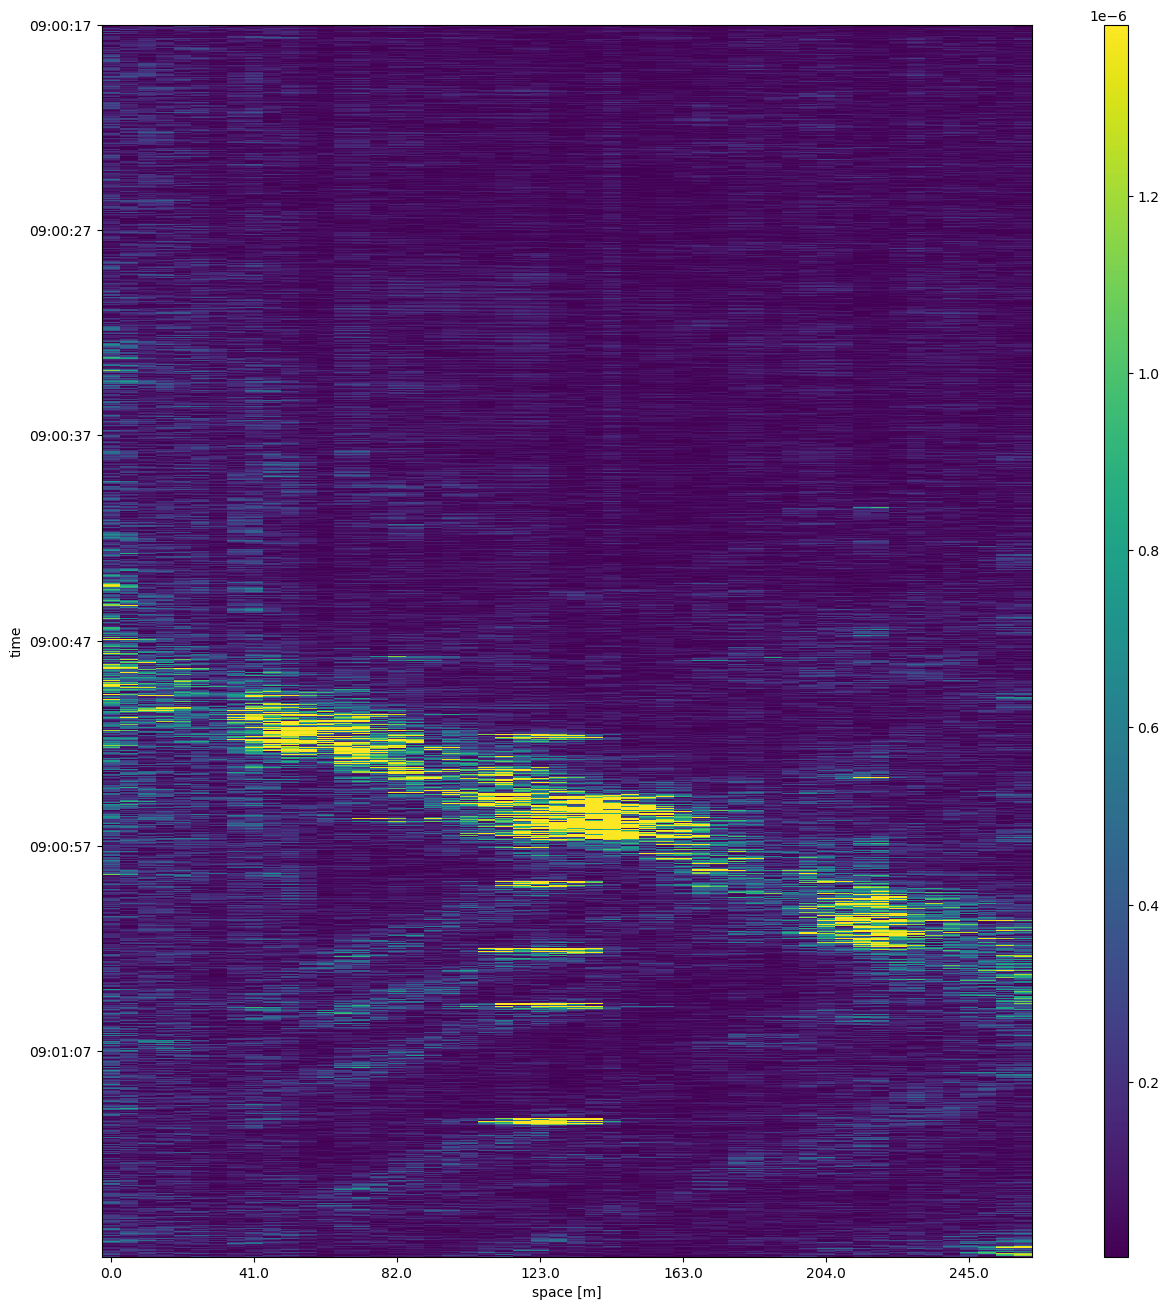

In [27]:


fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df -= df.mean()
df = np.abs(df) 
low, high = np.percentile(df, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()
